# Simple Linear Regression

## Dataset

Population of U.S. Cities

## Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

## Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

## Exploring and Understanding Data (EDA)

### 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as smodels
from statsmodels.formula.api import ols

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

### 2. Collect and load data

In [8]:
city = pd.read_csv("bigcity.csv",usecols=[1,2])
city.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


### 3. Explore numeric variables - five number summary

In [9]:
city.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


In [30]:
# No missing values
# Increase in numbers from u to x
# Both Variables seem to be right skewed
# There is a major difference in the minimum values of both the variables
# Slightly higher spread in x

### 3a. Visualize numeric variables in boxplot and histograms
### 3b. Measure spread – variance and standard deviation

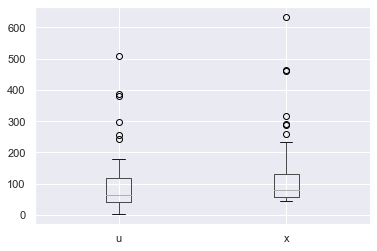

In [18]:
city.boxplot()
plt.show()

In [42]:
# Variable x's median is bigger than that of u
# And overall, x seems to be shifted higher than u

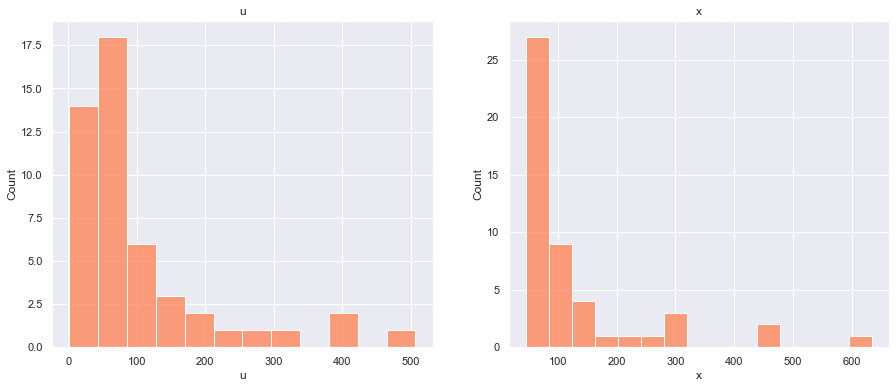

In [13]:
a=1
b=2
c=1
plt.figure(figsize=[15,6])

for i in city.columns:
    plt.subplot(a,b,c)
    sns.histplot(city.loc[:,i],color='coral')
    plt.title(i)
    c=c+1
plt.show()

In [43]:
# Data is right skewed

In [28]:
np.var(city)

u    10677.959184
x    14849.468555
dtype: float64

In [29]:
np.std(city)

u    103.334211
x    121.858396
dtype: float64

In [44]:
# As discussed above, x has more variation and spread than u

### 4. Explore relationships between variables using scatterplots and two-way cross tabulations

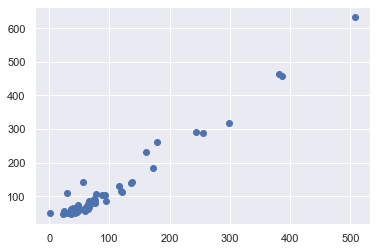

In [33]:
plt.scatter(city.u, city.x)
plt.show()

<AxesSubplot:xlabel='x', ylabel='u'>

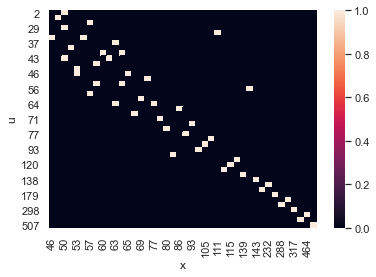

In [40]:
sns.heatmap(pd.crosstab(city.u, city.x))

In [41]:
# There seems to be a linear relationship between the two variables

### 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [45]:
city.shape

(49, 2)

In [16]:
x = city.u
y = city.x

In [48]:
# Variable u is the independent variable
# And Variable x is the dependent variable

### 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [47]:
city.isna().sum()

u    0
x    0
dtype: int64

In [49]:
# No missing values

In [50]:
city.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


In [51]:
# There is a strong correlation between the two variables

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

### 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training size:", xtrain.shape)
print("Test size:", xtest.shape)

Training size: (39,)
Test size: (10,)


### 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [18]:
lr = LinearRegression()
lr.fit(pd.DataFrame(xtrain), ytrain)

LinearRegression()

In [19]:
print("Intercept(b0):", lr.intercept_)
print("Coefficient(b1):", lr.coef_)

Intercept(b0): 8.345004524355502
Coefficient(b1): [1.15542506]


### 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

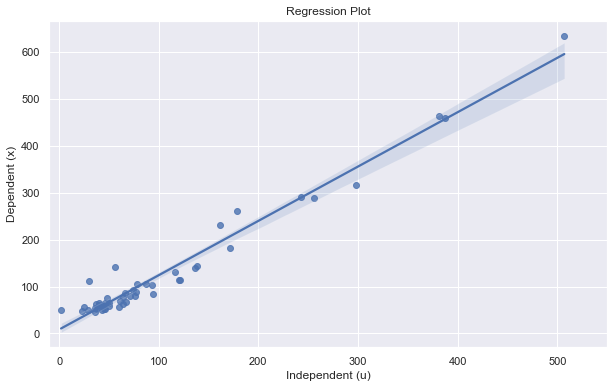

In [68]:
plt.figure(figsize=[10, 6])
sns.regplot(x, y)
plt.xlim(-10, 550)
plt.title("Regression Plot")
plt.xlabel("Independent (u)")
plt.ylabel("Dependent (x)")
plt.show()

In [77]:
# Regression line shows that we have a linear relationship between the two variables

### 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [73]:
y_pred = lr.predict(pd.DataFrame(xtest))

print("Test R Squared:", r2_score(y_pred, ytest))
print("Test RMSE:", np.sqrt(mean_squared_error(y_pred, ytest)))

Test R Squared: 0.9795997201316509
Test RMSE: 16.9662569723268


In [75]:
# Very high R Squared for our test set reveals that we have fit a good model

### 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [74]:
print("Accuracy Score:", lr.score(pd.DataFrame(xtest), ytest))

Accuracy Score: 0.980375436960151


In [76]:
# Our previous findings are confirmed with a high score of 98%